In [1]:
# Import libraries necessary for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


# Import supplementary visualizations code visuals.py
import visuals as vs

# Import display for notebook
%matplotlib inline

# Load the dataset
full_data = pd.read_csv('titanic_data.csv')

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Split the data into target and input variables
data = full_data.drop('Survived', axis=1)
outcomes = full_data['Survived']

# Print the first few entries of the RMS Titanic data
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Lets's create a function to check the accuracy of our predictions
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


## Making Predictions

In [4]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)     

In [5]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


Predictions have an accuracy of 61.62%

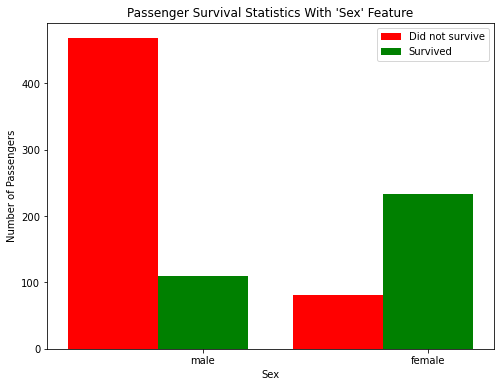

In [6]:
vs.survival_stats(data, outcomes, 'Sex')

In [7]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [8]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


Predictions have an accuracy of 78.68%

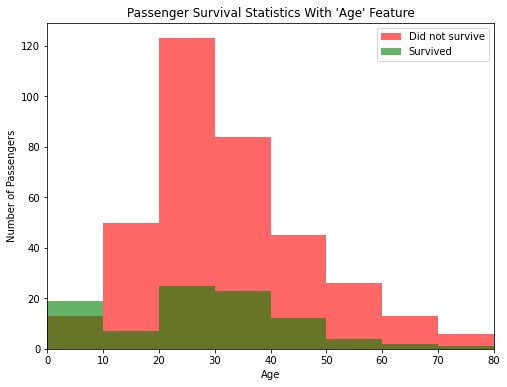

In [9]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])


In [10]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
                
            else:
                 predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [11]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


Predictions have an accuracy of 79.35%.

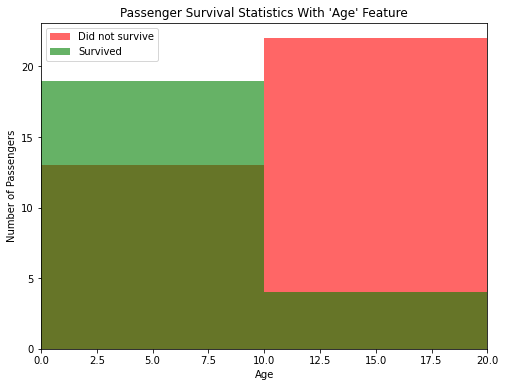

In [12]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

In [13]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Age'] < 10:
            predictions.append(1)
            
        else:
            if passenger['Sex'] == 'female' and passenger['Pclass'] < 3:
                predictions.append(1)
                
            else:
                if passenger['Sex'] == 'female' and passenger['Parch'] == 0:
                    predictions.append(1)
                
                else:
                    predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

In [14]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.03%.


After so many tries 😔, Predictions have an accuracy of 81.03%.

Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? 
Name two features about the data used in this scenario that might be helpful for making the predictions.

Hmmm 🤔🤔 predicting the GDP of a country. Two features can be education and investment.